In [1]:
import mne
import numpy as np
import pandas as pd

In [17]:
data10 = mne.io.read_raw_edf('eeg10.edf', preload=True)
data10

Extracting EDF parameters from /home/anjali/Desktop/Mehnat/BTP2/eeg10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1389311  =      0.000 ...  5426.996 secs...


<RawEDF  |  eeg10.edf, n_channels x n_times : 21 x 1389312 (5427.0 sec), ~222.6 MB, data loaded>

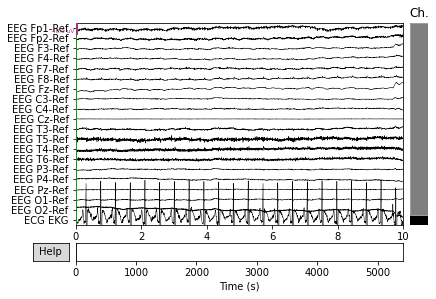

Figure(432x288)


In [3]:
print(data10.plot())

In [4]:
data10.info
data10.n_times

1389312

In [4]:
data10.info

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | EEG Fp1-Ref, EEG Fp2-Ref, EEG F3-Ref, EEG F4-Ref, ...
    chs : list | 21 items (EEG: 21)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 128.0 Hz
    meas_date : tuple | 2011-11-11 11:11:11 GMT
    nchan : int | 21
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 256.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name 

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


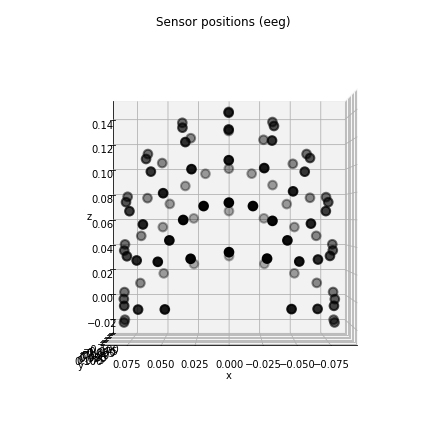

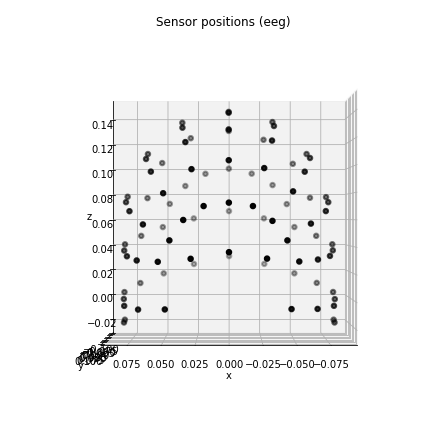

In [6]:
montage = mne.channels.make_standard_montage("standard_1020")
montage.plot()

In [46]:
data10.set_montage(montage, raise_if_subset=False)

DigMontage is a superset of info. 94 in DigMontage will be ignored. The ignored channels are: {'CPz', 'F2', 'Cz', 'P3', 'FC6', 'O9', 'CP3', 'CP5', 'P1', 'F1', 'F5', 'AF8', 'T7', 'P5', 'T8', 'PO5', 'P6', 'P2', 'A2', 'FC1', 'F8', 'PO7', 'C1', 'C5', 'T6', 'AF10', 'P4', 'AF9', 'Iz', 'Fz', 'P10', 'AF3', 'M1', 'C6', 'CP2', 'TP8', 'T10', 'O1', 'Fp2', 'P9', 'CP6', 'T3', 'C4', 'AF1', 'PO4', 'PO8', 'AF5', 'F4', 'FT9', 'O10', 'T5', 'CP1', 'AF4', 'F9', 'FC5', 'POz', 'PO1', 'P7', 'F3', 'A1', 'AF2', 'AFz', 'FC4', 'TP10', 'C2', 'F10', 'Oz', 'Pz', 'C3', 'TP9', 'Fp1', 'P8', 'M2', 'T9', 'TP7', 'FT8', 'PO10', 'PO9', 'PO3', 'FT7', 'CP4', 'AF7', 'PO2', 'F7', 'FCz', 'FC3', 'PO6', 'FT10', 'O2', 'F6', 'T4', 'AF6', 'FC2', 'Fpz'}


<ipython-input-46-0d5d68f3ab2a>:1: RuntimeWarning: DigMontage is a only a subset of info. Did not set 21 channel positions:
EEG O2-Ref, EEG Fp1-Ref, Resp Effort, EEG Pz-Ref, EEG Fz-Ref, EEG O1-Ref, EEG F7-Ref, EEG T5-Ref, EEG C3-Ref, EEG F4-Ref, EEG T4-Ref, EEG T3-Ref, EEG Cz-Ref, EEG F3-Ref, ECG EKG, EEG Fp2-Ref, EEG P4-Ref, EEG F8-Ref, EEG C4-Ref, EEG T6-Ref, EEG P3-Ref
  data10.set_montage(montage, raise_if_subset=False)


<RawEDF  |  eeg10.edf, n_channels x n_times : 21 x 1389312 (5427.0 sec), ~222.6 MB, data loaded>

In [5]:
print(data10.load_data())

Reading 0 ... 1389311  =      0.000 ...  5426.996 secs...
<RawEDF  |  eeg10.edf, n_channels x n_times : 21 x 1389312 (5427.0 sec), ~222.6 MB, data loaded>


Converting "time" to "<class 'numpy.int64'>"...


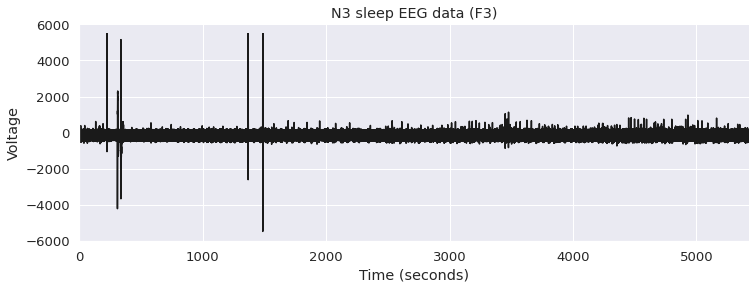

In [23]:
# some graph like edf browser generated
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

# Define sampling frequency and time vector
sf = 256
df = data10.to_data_frame()
df = df[:]

time = np.arange(df.shape[0]) / sf

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(time, df, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.xlim([time.min(), time.max()])
plt.title('N3 sleep EEG data (F3)')
sns.despine()

/usr/lib/python3/dist-packages/scipy/signal/spectral.py:1633: UserWarning: nperseg = 1024 is greater than input length  = 21, using nperseg = 21
  .format(nperseg, input_length))


ValueError: x and y must have same first dimension, but have shapes (11,) and (1389312, 11)

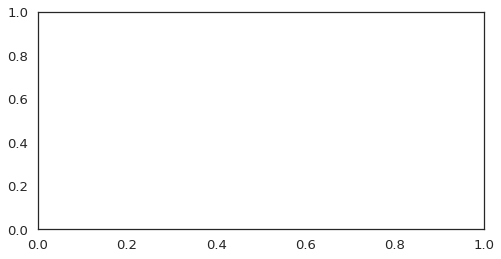

In [25]:
from scipy import signal

sf = 256
data = df

# Define window length (4 seconds)
win = 4 * sf
freqs, psd = signal.welch(data, sf, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])
sns.despine()

In [1]:
# # Define delta lower and upper limits
# low, high = 0.5, 4

# # Find intersecting values in frequency vector
# idx_delta = np.logical_and(freqs >= low, freqs <= high)

# # Plot the power spectral density and fill the delta area
# plt.figure(figsize=(7, 4))
# plt.plot(freqs, psd, lw=2, color='k')
# plt.fill_between(freqs, psd, where=idx_delta, color='skyblue')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Power spectral density (uV^2 / Hz)')
# plt.xlim([0, 10])
# plt.ylim([0, psd.max() * 1.1])
# plt.title("Welch's periodogram")
# sns.despine()

In [86]:
def _stamp_to_dt(utc_stamp):
    """Convert timestamp to datetime object in Windows-friendly way."""
    # The min on windows is 86400
    stamp = [int(s) for s in utc_stamp]
    if len(stamp) == 1:  # In case there is no microseconds information
        stamp.append(0)
    return (datetime.fromtimestamp(0, tz=timezone.utc) +
            timedelta(0, stamp[0], stamp[1]))  # day, sec, μs

In [9]:
len(data10.info['ch_names'])

21

In [10]:
signal_rep_per_second = data10.n_times / 5427
signal_rep_per_second

256.0

In [29]:
merged = pd.read_csv('merged.csv')
merged.head()
merged.loc[0][9]

0.0

In [22]:
# how to access individual elements of csv file 'merged'
print(merged.loc[0][0])
print(merged.loc[0][1])
print(merged.loc[0][2])
print(merged.loc[0][3])
print(merged.loc[0][4])
print(merged.loc[0][5])
print(merged.loc[0][6])

0.0
0.0
0.0
0.0
1.0
0.0
1.0


In [62]:
arr = merged['0.9']
arr

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15410    NaN
15411    NaN
15412    NaN
15413    NaN
15414    NaN
Name: 0.9, Length: 15415, dtype: float64

In [68]:
merged.columns = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       '0.9', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15',
       '0.16', '0.17', '0.18', '0.19', '0.20', '0.21', '0.22', '0.23', '0.24',
       '0.25', '0.26', '0.27', '0.28', '0.29', '0.30', '0.31','0.32', '0.33', '0.34', '0.35', '0.36', '0.37', '0.38', '0.39',
       '0.40', '0.41', '0.42', '0.43', '0.44', '0.45', '0.46', '0.47', '0.48',
       '0.49', '0.50', '0.51', '0.52', '0.53', '0.54', '0.55', '0.56', '0.57',
       '0.58', '0.59', '0.60', '0.61', '0.62', '0.63', '0.64', '0.65',
       '0.66', '0.67', '0.68', '0.69', '0.70', '0.71', '0.72', '0.73', '0.74', '0.75', '0.76', '0.77', '0.78', '0.79']

In [16]:
num_rows = len(list_eeg10)
num_rows

5425

In [69]:
merged.head()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
events = mne.find_events(data10, stim_channel='Resp Effort')
events

array([], shape=(0, 3), dtype=int32)